<a href="https://colab.research.google.com/github/Poorvishivannaa/Iris-Flower/blob/main/Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
iris_df = pd.read_csv('/content/drive/MyDrive/Iris_Flower_Dataset.csv')


In [40]:
# Display the first few rows of the dataset
print("Sample rows of the Iris dataset:")
iris_df.sample(5)

Sample rows of the Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
141,6.9,3.1,5.1,2.3,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica


Exploratory Data Analysis

In [41]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
# Summary statistics
print("\nSummary statistics of the Iris dataset:")
iris_df.describe()


Summary statistics of the Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
# Distribution of species
print("\nDistribution of species:")
print(iris_df['species'].value_counts())


Distribution of species:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [44]:
# Calculate skewness, kurtosis, mean, and median of each feature
skewness = iris_df.skew(numeric_only=True)
kurtosis = iris_df.kurtosis(numeric_only=True)
mean = iris_df.mean(numeric_only=True)
median = iris_df.median(numeric_only=True)

# Create a DataFrame to display the results
summary_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Mean': mean,
    'Median': median
})

print(summary_stats)


              Skewness  Kurtosis      Mean  Median
sepal_length  0.314911 -0.552064  5.843333    5.80
sepal_width   0.334053  0.290781  3.054000    3.00
petal_length -0.274464 -1.401921  3.758667    4.35
petal_width  -0.104997 -1.339754  1.198667    1.30


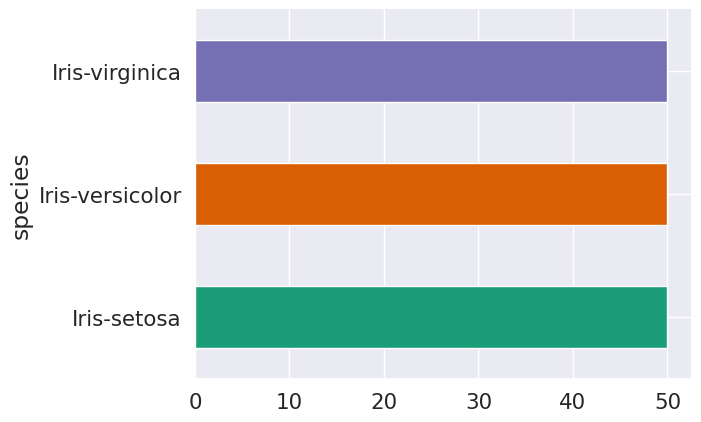

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
iris_df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



**Check for Missing values, Duplicates and Outliers**

In [46]:
# Find missing values
print("\nMissing Values:")
iris_df.isnull().sum()


Missing Values:


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [47]:
# Find duplicate rows
duplicate_rows = iris_df[iris_df.duplicated()]
duplicate_rows

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [48]:
iris_df=iris_df.drop_duplicates()

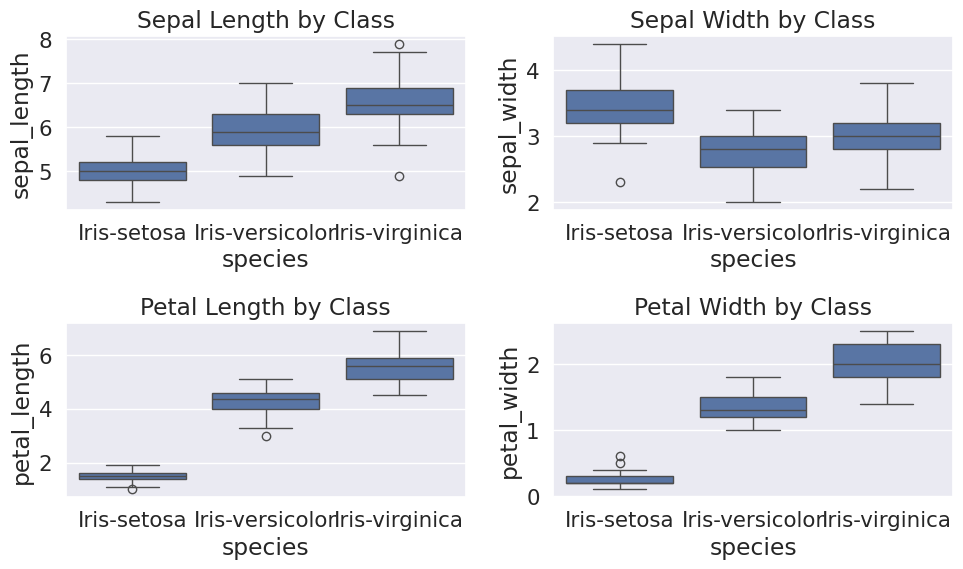

In [49]:
# Outlier Detection
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris_df)
plt.title('Sepal Length by Class')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.title('Sepal Width by Class')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris_df)
plt.title('Petal Length by Class')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris_df)
plt.title('Petal Width by Class')

plt.tight_layout()
plt.show()

**Visualizations**

In [50]:
# Distribution of species
print("\nDistribution of species:")
print(iris_df['species'].value_counts())


Distribution of species:
species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


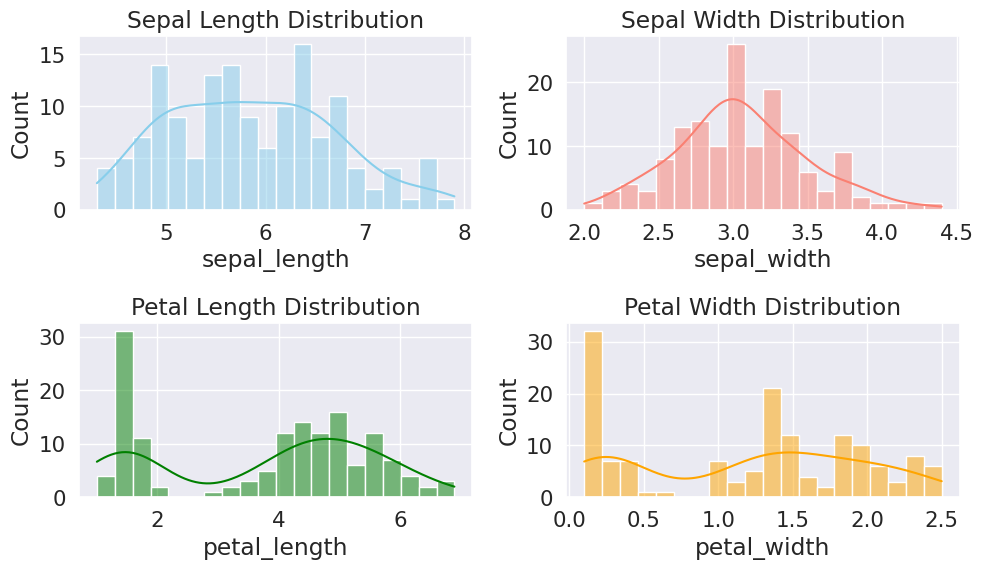

In [51]:
# Feature Distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(iris_df['sepal_length'], kde=True, bins=20, color='skyblue')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
sns.histplot(iris_df['sepal_width'], kde=True, bins=20, color='salmon')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(iris_df['petal_length'], kde=True, bins=20, color='green')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
sns.histplot(iris_df['petal_width'], kde=True, bins=20, color='orange')
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()



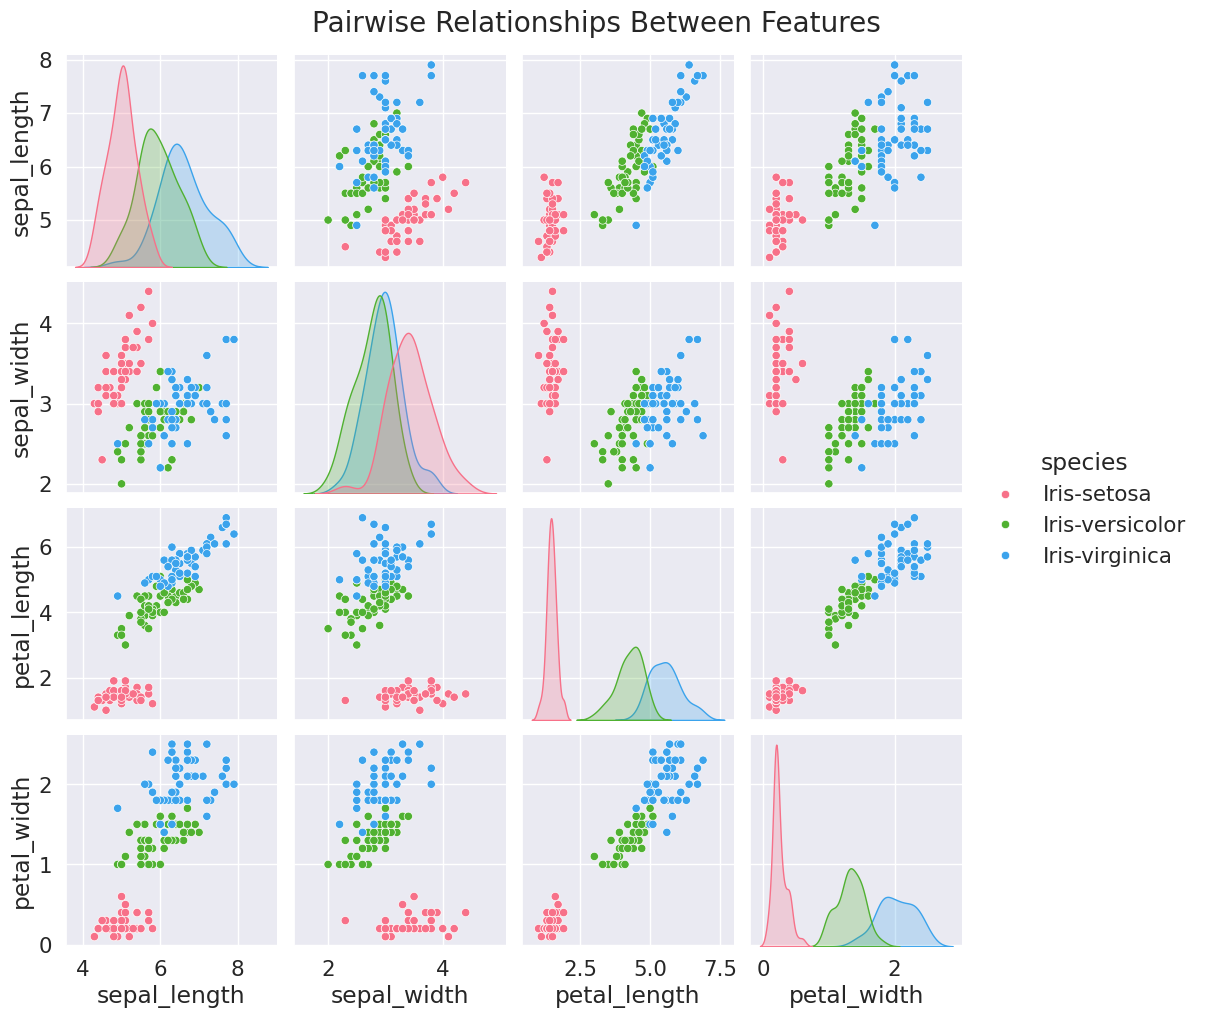

In [52]:
# Pairwise Relationships
sns.pairplot(iris_df, hue='species', palette='husl')
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

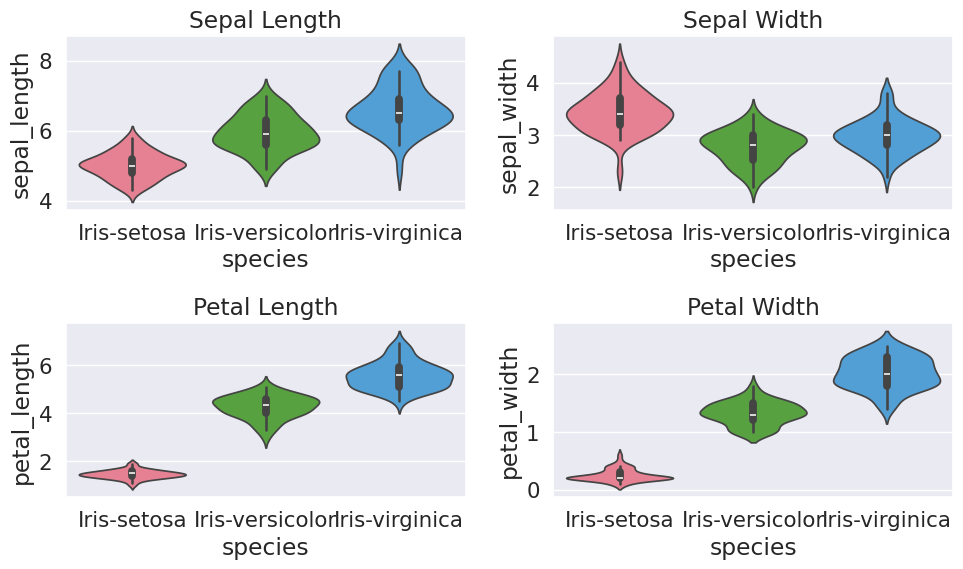

In [53]:
# Create violin plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x='species',hue='species',  y='sepal_length', data=iris_df, palette='husl')
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
sns.violinplot(x='species', hue='species', y='sepal_width', data=iris_df, palette='husl')
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
sns.violinplot(x='species', hue='species', y='petal_length', data=iris_df, palette='husl')
plt.title('Petal Length')

plt.subplot(2, 2, 4)
sns.violinplot(x='species',hue='species',  y='petal_width', data=iris_df, palette='husl')
plt.title('Petal Width')

plt.tight_layout()
plt.show()



**Data Preparation**

Initially, Clean, Encode and split the dataset

In [54]:
# Split the dataset into features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [55]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train" , X_train.shape)
print("X_test" , X_test.shape)
print("y_train" , y_train.shape)
print("y_test" , y_test.shape)

X_train (117, 4)
X_test (30, 4)
y_train (117,)
y_test (30,)


**Model training and evaluation**

In [57]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [58]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Predict the classes for test data
y_pred = rf_classifier.predict(X_test)

In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [61]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [62]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


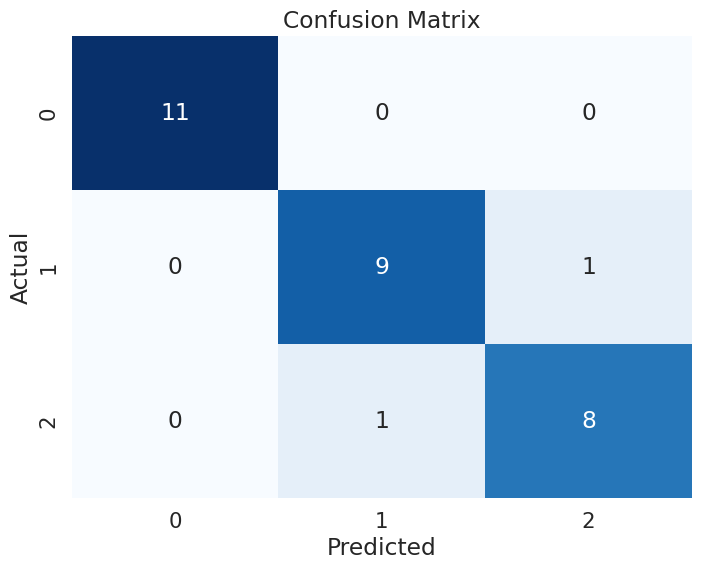

In [63]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Model Prediction**

In [64]:
#First rpw
iris_df.iloc[0]

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2
species,Iris-setosa


In [65]:
# Give a sample input data point features (sepal length, sepal width, petal length, petal width)
sample_input = [[5.1, 3.5, 1.4, 0.2]]

predicted_label = rf_classifier.predict(sample_input)
predicted_species = label_encoder.inverse_transform(predicted_label)
print("True Species:")
print(iris_df.head(1))
print()
print("Sample input:", sample_input)
print("Predicted Species:", predicted_species)

True Species:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa

Sample input: [[5.1, 3.5, 1.4, 0.2]]
Predicted Species: ['Iris-setosa']


Here both the predicted species and First row matches

In [66]:
predicted_species = label_encoder.inverse_transform(y_pred)
true_species = label_encoder.inverse_transform(y_test)
comparison_df = pd.DataFrame({'Predicted Species': predicted_species, 'True Species': true_species}).head()
comparison_df


,Predicted Species,True Species
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-virginica
